# Run the MNE BIDS Pipeline

In [1]:
# import basic EEG manipulation and analysis modules
import mne_bids_pipeline
from mne_bids import BIDSPath

# import function to load configuration from file
from mne_bids_pipeline._config_import import _import_config as getConfig

# allow for definition of optional parameters in a function definition
from typing import Optional

In [2]:
# set the file path of the main configuration file
config_path = "./mne-bids/config/mne-bids-pipeline_tests.py"

In [3]:
# load configured settings from file
cfg = getConfig(
    config_path=config_path
)

In [4]:
# define a function which gets used in application of the ICA results to the raw data
def get_input_fnames_apply_ica(
    *,
    cfg,
    subject: str,
    session: Optional[str],
) -> dict:
    bids_basename = BIDSPath(
        subject=subject,
        session=session,
        task=cfg.task,
        acquisition=cfg.acq,
        recording=cfg.rec,
        space=cfg.space,
        datatype='eeg',
        root=cfg.deriv_root,
        check=False,
    )
    paths = dict()
    paths["ica"] = bids_basename.copy().update(suffix="ica", extension=".fif")
    paths["raw"] = bids_basename.copy().update(suffix="proc-filt_raw", extension=".fif")
    paths["components"] = bids_basename.copy().update(
        processing="ica", suffix="components", extension=".tsv"
    )
    return paths

In [5]:
# checkup: print config contents
print(cfg)

namespace(study_name='EEG-course-project', bids_root=PosixPath('/home/fspletti/vorlesungen/2023S_Signal_processing_and_Analysis_of_human_brain_potentials_(EEG)/git/eeg_course_project/data/ds003702'), deriv_root=PosixPath('/home/fspletti/vorlesungen/2023S_Signal_processing_and_Analysis_of_human_brain_potentials_(EEG)/git/eeg_course_project/data/ds003702/derivatives/mne-bids-pipeline'), subjects_dir='./data/ds003702/', sessions='all', task='SocialMemoryCuing', runs='all', exclude_runs=None, crop_runs=None, acq=None, proc=None, rec=None, space=None, plot_psd_for_runs='all', subjects=['01', '02', '03', '04', '05', '06', '07', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '38', '39', '40', '41', '43', '44', '45', '46', '48', '49', '50'], exclude_subjects=[], process_empty_room=True, process_rest=True, ch_types=['eeg'], data_type='eeg', eog_channels=None, eeg_bipolar_channels=N

In [6]:
cfg.raw_resample_sfreq
[cfg.l_freq, cfg.h_freq]

[1.0, 30.0]

In [7]:
# checkup: # print directories of the stored bids root path
cfg.bids_root.parts[-2:]

('data', 'ds003702')

In [8]:
curr_steps = "init"
!mne_bids_pipeline --config {config_path} --steps {curr_steps}

┌────────┬ Welcome aboard MNE-BIDS-Pipeline! 👋 ────────────────────────────────
│07:43:09│ 📝 Using configuration: ./mne-bids/config/mne-bids-pipeline_tests.py
└────────┴ 
┌────────┬ init/_01_init_derivatives_dir ───────────────────────────────────────
│07:43:09│ ⏳️ Initializing output directories.
└────────┴ done (1s)
┌────────┬ init/_02_find_empty_room ────────────────────────────────────────────
│07:43:10│ ⏩ Skipping, empty-room data only relevant for MEG …
└────────┴ done (1s)
┌────────┬ init/_01_init_derivatives_dir ───────────────────────────────────────
│07:43:10│ ✅ Output directories already exist …
└────────┴ done (1s)
┌────────┬ init/_02_find_empty_room ────────────────────────────────────────────
│07:43:10│ ⏩ Skipping, empty-room data only relevant for MEG …
└────────┴ done (1s)


In [9]:
# checkup: check, whether output directory was created
#          The derivatives directory should exist and contain a subfolder per selected subject.
#          The subjects subfolders should be empty if no data were alread generated.
curr_bids_root = cfg.bids_root.__str__()
!ls "{curr_bids_root}"/derivatives/mne-bids-pipeline/

dataset_description.json  sub-07  sub-15  sub-22  sub-29  sub-38  sub-46
sub-01			  sub-09  sub-16  sub-23  sub-30  sub-39  sub-48
sub-02			  sub-10  sub-17  sub-24  sub-32  sub-40  sub-49
sub-03			  sub-11  sub-18  sub-25  sub-33  sub-41  sub-50
sub-04			  sub-12  sub-19  sub-26  sub-34  sub-43
sub-05			  sub-13  sub-20  sub-27  sub-35  sub-44
sub-06			  sub-14  sub-21  sub-28  sub-36  sub-45


In [10]:
curr_steps = "preprocessing/_01_data_quality"
!mne_bids_pipeline --config {config_path} --steps {curr_steps}

┌────────┬ Welcome aboard MNE-BIDS-Pipeline! 👋 ────────────────────────────────
│07:43:13│ 📝 Using configuration: ./mne-bids/config/mne-bids-pipeline_tests.py
└────────┴ 
┌────────┬ init/_01_init_derivatives_dir ───────────────────────────────────────
│07:43:13│ ✅ Output directories already exist …
└────────┴ done (1s)
┌────────┬ init/_02_find_empty_room ────────────────────────────────────────────
│07:43:13│ ⏩ Skipping, empty-room data only relevant for MEG …
└────────┴ done (1s)
┌────────┬ preprocessing/_01_data_quality ──────────────────────────────────────
│07:43:16│ ⏳️ sub-02 Initializing report HDF5 file
│07:43:16│ ⏳️ sub-01 Initializing report HDF5 file
│07:43:16│ ⏳️ sub-03 Initializing report HDF5 file
│07:43:16│ ⏳️ sub-04 Initializing report HDF5 file
│07:43:16│ ⏳️ sub-05 Initializing report HDF5 file
│07:43:16│ ⏳️ sub-01 Adding original raw data to report
│07:43:16│ ⏳️ sub-03 Adding original raw data to report
│07:43:16│ ⏳️ sub-02 Adding original raw data to report
│07:43:16│

In [11]:
# checkup: print some content which was written to file
import h5py

# set filename
curr_checkup_filename = f"{curr_bids_root}/derivatives/mne-bids-pipeline/sub-01/eeg/sub-01_task-SocialMemoryCuing_report.h5"

# print file name if file exists
!ls "{curr_checkup_filename}" | xargs basename

# import data
curr_checkup_h5file = h5py.File(curr_checkup_filename, 'r')
curr_html_length = len(curr_checkup_h5file["mnepython/key__content/idx_0/key_html"])
htmlContent = ''.join([ chr(curr_checkup_h5file["mnepython/key__content/idx_0/key_html"][idx] ) for idx in range(curr_html_length) ])
curr_checkup_h5file.close()
# print excerpt of html output
print(f"[...]\n{htmlContent[2500:2850]}\n[...]")

# print hint regarding extra data
print("\n===\nmore data: see at..")
# for more data, open the written html report file
!ls ./"{cfg.bids_root.parts[-2]}"/"{cfg.bids_root.parts[-1]}"/derivatives/mne-bids-pipeline/sub-01/eeg/sub-01_task-SocialMemoryCuing_report.html

sub-01_task-SocialMemoryCuing_report.h5
[...]
</details>
        <details open>
            <summary><strong>Data</strong></summary>
            <table class="table table-hover table-striped table-sm table-responsive small">
                
                <tr>
                    <th>Sampling frequency</th>
                    <td>500.00 Hz</td>
                </tr>
                
       
[...]

===
more data: see at..
./data/ds003702/derivatives/mne-bids-pipeline/sub-01/eeg/sub-01_task-SocialMemoryCuing_report.html


In [12]:
curr_steps = "preprocessing/_02_head_pos"
!mne_bids_pipeline --config {config_path} --steps {curr_steps}

┌────────┬ Welcome aboard MNE-BIDS-Pipeline! 👋 ────────────────────────────────
│07:45:13│ 📝 Using configuration: ./mne-bids/config/mne-bids-pipeline_tests.py
└────────┴ 
┌────────┬ init/_01_init_derivatives_dir ───────────────────────────────────────
│07:45:13│ ✅ Output directories already exist …
└────────┴ done (1s)
┌────────┬ init/_02_find_empty_room ────────────────────────────────────────────
│07:45:13│ ⏩ Skipping, empty-room data only relevant for MEG …
└────────┴ done (1s)
┌────────┬ preprocessing/_02_head_pos ──────────────────────────────────────────
│07:45:13│ ⏩ Skipping …
└────────┴ done (1s)


In [13]:
# checkup: not needed, since this step was skipped

In [14]:
curr_steps = "preprocessing/_03_maxfilter"
!mne_bids_pipeline --config {config_path} --steps {curr_steps}

┌────────┬ Welcome aboard MNE-BIDS-Pipeline! 👋 ────────────────────────────────
│07:45:15│ 📝 Using configuration: ./mne-bids/config/mne-bids-pipeline_tests.py
└────────┴ 
┌────────┬ init/_01_init_derivatives_dir ───────────────────────────────────────
│07:45:16│ ✅ Output directories already exist …
└────────┴ done (1s)
┌────────┬ init/_02_find_empty_room ────────────────────────────────────────────
│07:45:16│ ⏩ Skipping, empty-room data only relevant for MEG …
└────────┴ done (1s)
┌────────┬ preprocessing/_03_maxfilter ─────────────────────────────────────────
│07:45:16│ ⏩ Skipping …
└────────┴ done (1s)


In [15]:
# checkup: not needed, since this step was skipped

In [16]:
curr_steps = "preprocessing/_04_frequency_filter"
!mne_bids_pipeline --config {config_path} --steps {curr_steps}

┌────────┬ Welcome aboard MNE-BIDS-Pipeline! 👋 ────────────────────────────────
│07:45:18│ 📝 Using configuration: ./mne-bids/config/mne-bids-pipeline_tests.py
└────────┴ 
┌────────┬ init/_01_init_derivatives_dir ───────────────────────────────────────
│07:45:18│ ✅ Output directories already exist …
└────────┴ done (1s)
┌────────┬ init/_02_find_empty_room ────────────────────────────────────────────
│07:45:18│ ⏩ Skipping, empty-room data only relevant for MEG …
└────────┴ done (1s)
┌────────┬ preprocessing/_04_frequency_filter ──────────────────────────────────
│07:45:26│ ⏳️ sub-02 Setting EEG channel locations to template montage: standard_1005.
│07:45:26│ ⏳️ sub-02 Dropping channels: EOG, BIP1, BIP2, BIP3, BIP4, BIP5, BIP6, BIP7, BIP8, BIP9, BIP10, BIP11, BIP12, BIP13, BIP14, BIP15, BIP16, BIP17, BIP18, BIP19, BIP20, BIP21, BIP22, BIP23, BIP24
│07:45:26│ ⏳️ sub-05 Setting EEG channel locations to template montage: standard_1005.
│07:45:26│ ⏳️ sub-05 Dropping channels: EOG, BIP1, BIP2,

In [17]:
import mne
import matplotlib.pyplot as plt

In [18]:
%matplotlib widget

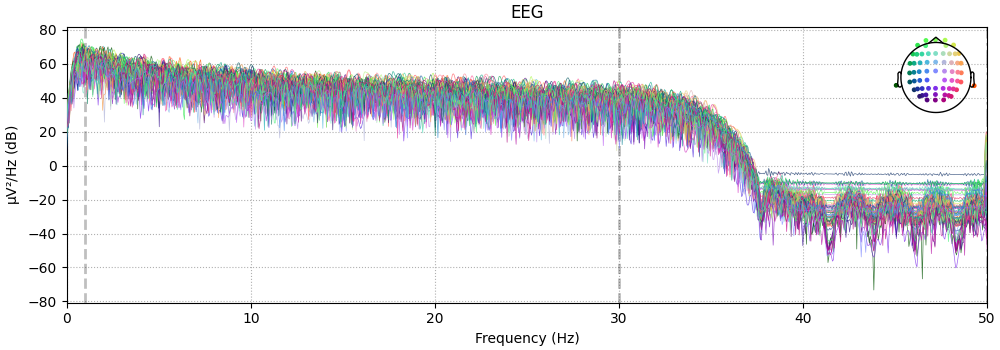

checkup plot showing reduced bandwidth of eeg signals


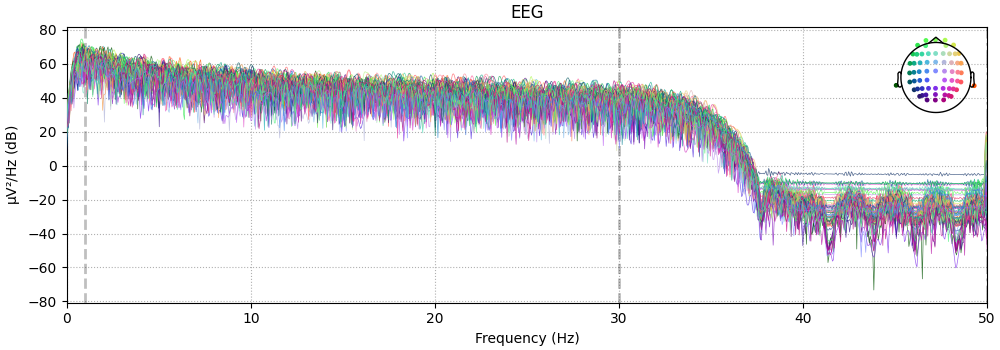

In [19]:
# checkup: print spectrum of original and filtered signals, print sample rate of new raw data file
curr_checkup_filename = f"{curr_bids_root}/derivatives/mne-bids-pipeline/sub-01/eeg/sub-01_task-SocialMemoryCuing_proc-filt_raw.fif"
curr_checkup_raw_filtered = mne.io.read_raw_fif(curr_checkup_filename, preload=True)
curr_checkup_raw_filtered.plot_psd()
print("checkup plot showing reduced bandwidth of eeg signals")

In [20]:
# checkup: print file name if the processed file exists
curr_subject_path = f"{curr_bids_root}/derivatives/mne-bids-pipeline/sub-01/eeg"
!ls "{curr_subject_path}"/sub-01_task-SocialMemoryCuing_proc-filt_raw.fif | xargs basename

sub-01_task-SocialMemoryCuing_proc-filt_raw.fif


In [21]:
curr_steps = "preprocessing/_05_make_epochs"
!mne_bids_pipeline --config {config_path} --steps {curr_steps}

┌────────┬ Welcome aboard MNE-BIDS-Pipeline! 👋 ────────────────────────────────
│07:49:51│ 📝 Using configuration: ./mne-bids/config/mne-bids-pipeline_tests.py
└────────┴ 
┌────────┬ init/_01_init_derivatives_dir ───────────────────────────────────────
│07:49:51│ ✅ Output directories already exist …
└────────┴ done (1s)
┌────────┬ init/_02_find_empty_room ────────────────────────────────────────────
│07:49:51│ ⏩ Skipping, empty-room data only relevant for MEG …
└────────┴ done (1s)
┌────────┬ preprocessing/_05_make_epochs ───────────────────────────────────────
│07:49:53│ ⏳️ sub-01 Loading filtered raw data from sub-01_task-SocialMemoryCuing_proc-filt_raw.fif
│07:49:53│ ⏳️ sub-01 Creating task-related epochs …
│07:49:54│ ⏳️ sub-02 Loading filtered raw data from sub-02_task-SocialMemoryCuing_proc-filt_raw.fif
│07:49:54│ ⏳️ sub-04 Loading filtered raw data from sub-04_task-SocialMemoryCuing_proc-filt_raw.fif
│07:49:54│ ⏳️ sub-06 Loading filtered raw data from sub-06_task-SocialMemoryCuing

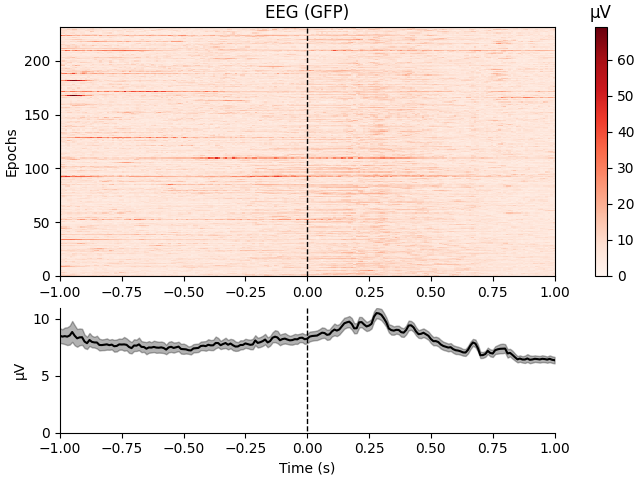

[<Figure size 640x480 with 3 Axes>]

In [22]:
# checkup: plot epochs
curr_checkup_epochs = mne.read_epochs(f"{curr_subject_path}/sub-01_task-SocialMemoryCuing_epo.fif")
mne.viz.plot_epochs_image(curr_checkup_epochs)

In [23]:
curr_steps = "preprocessing/_06a_run_ica"
!mne_bids_pipeline --config {config_path} --steps {curr_steps}

┌────────┬ Welcome aboard MNE-BIDS-Pipeline! 👋 ────────────────────────────────
│07:52:12│ 📝 Using configuration: ./mne-bids/config/mne-bids-pipeline_tests.py
└────────┴ 
┌────────┬ init/_01_init_derivatives_dir ───────────────────────────────────────
│07:52:12│ ✅ Output directories already exist …
└────────┴ done (1s)
┌────────┬ init/_02_find_empty_room ────────────────────────────────────────────
│07:52:12│ ⏩ Skipping, empty-room data only relevant for MEG …
└────────┴ done (1s)
┌────────┬ preprocessing/_06a_run_ica ──────────────────────────────────────────
│07:52:14│ ⏳️ sub-01 Loading filtered raw data from sub-01_task-SocialMemoryCuing_proc-filt_raw
│07:52:14│ ⏳️ sub-02 Loading filtered raw data from sub-02_task-SocialMemoryCuing_proc-filt_raw
│07:52:14│ ⏳️ sub-03 Loading filtered raw data from sub-03_task-SocialMemoryCuing_proc-filt_raw
│07:52:14│ ⏳️ sub-04 Loading filtered raw data from sub-04_task-SocialMemoryCuing_proc-filt_raw
│07:52:14│ ⏳️ sub-01 No ECG or magnetometer chann

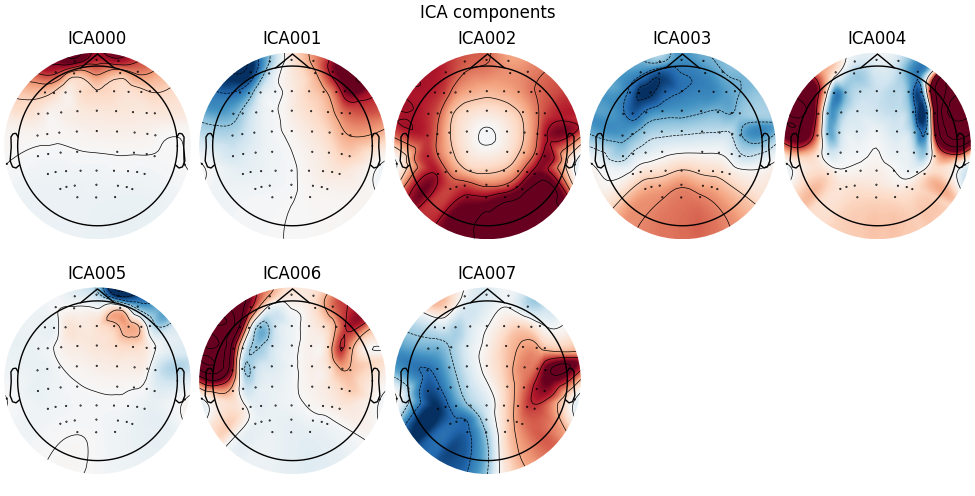

checkup: ICA component plots of the selected subject


In [24]:
# checkup: plot ica components
curr_checkup_ica = mne.preprocessing.read_ica(f"{curr_subject_path}/sub-01_task-SocialMemoryCuing_ica.fif")
curr_checkup_ica.apply(curr_checkup_raw_filtered)
curr_checkup_ica.plot_components(inst=curr_checkup_raw_filtered)
print("checkup: ICA component plots of the selected subject")

In [25]:
import mne
import mne_icalabel
from mne.preprocessing import read_ica
import pandas as pd
from mne_bids_pipeline._config_utils import (
    get_subjects,
    get_sessions
)

for subject in get_subjects(cfg):
    for session in get_sessions(cfg):
        paths = get_input_fnames_apply_ica(cfg=cfg, subject=subject, session=session)
        ica = read_ica(paths["ica"])
        raw = mne.io.read_raw_fif(paths["raw"])
        
        label_results = mne_icalabel.label_components(raw, ica, method="iclabel")
        
        print(str(ica)) # checkup print of known data about ICA
        print("\nresulting predictions:", label_results["y_pred_proba"]) # checkup print
        print("\nresulting labels:     ", label_results["labels"])       # checkup print
        
        labels = label_results["labels"]
        exclude_idx = [
            idx for idx, label in enumerate(labels) if label not in ["brain", "other"]
        ]
        tsv_data = pd.read_csv(paths["components"], sep="\t")
        
        # checkup: print old content of the file
        print("\nold tsv file content:")
        print(str(tsv_data))
        
        tsv_data.loc[exclude_idx, "status"] = "bad"
        
        # checkup: print updated content of the file
        print("\nnew tsv file content:")
        print(tsv_data)
        
        tsv_data.to_csv(paths["components"], sep="\t", index=False)
    


<ICA | epochs decomposition, method: picard (fit in 39 iterations on 46632 samples), 8 ICA components (63 PCA components available), channel types: eeg, no sources marked for exclusion>

resulting predictions: [0.48660833 0.9977477  0.82226956 0.9747932  0.4546755  0.54981893
 0.62330765 0.9569508 ]

resulting labels:      ['eye blink', 'eye blink', 'brain', 'brain', 'brain', 'eye blink', 'brain', 'brain']

old tsv file content:
   component type            description status  status_description
0          0  ica  Independent Component   good                 NaN
1          1  ica  Independent Component   good                 NaN
2          2  ica  Independent Component   good                 NaN
3          3  ica  Independent Component   good                 NaN
4          4  ica  Independent Component   good                 NaN
5          5  ica  Independent Component   good                 NaN
6          6  ica  Independent Component   good                 NaN
7          7  ica  Inde

In [26]:
# checkup: print list of components given in updated …_proc-ica+components.tsv file
!cat "{curr_subject_path}/sub-01_task-SocialMemoryCuing_proc-ica_components.tsv"
# This file should contain a status like "bad" for eye blinks, or "good" for brain activity, as it is indicated above and visible in the ICA component plots.

component	type	description	status	status_description
0	ica	Independent Component	bad	
1	ica	Independent Component	bad	
2	ica	Independent Component	good	
3	ica	Independent Component	good	
4	ica	Independent Component	good	
5	ica	Independent Component	bad	
6	ica	Independent Component	good	
7	ica	Independent Component	good	


In [31]:
curr_steps = "preprocessing/_07a_apply_ica"
!mne_bids_pipeline --config {config_path} --steps {curr_steps}

┌────────┬ Welcome aboard MNE-BIDS-Pipeline! 👋 ────────────────────────────────
│09:14:20│ 📝 Using configuration: ./mne-bids/config/mne-bids-pipeline_tests.py
└────────┴ 
┌────────┬ init/_01_init_derivatives_dir ───────────────────────────────────────
│09:14:20│ ✅ Output directories already exist …
└────────┴ done (1s)
┌────────┬ init/_02_find_empty_room ────────────────────────────────────────────
│09:14:20│ ⏩ Skipping, empty-room data only relevant for MEG …
└────────┴ done (1s)
┌────────┬ preprocessing/_07a_apply_ica ────────────────────────────────────────
│09:14:22│ ⏳️ sub-01 Input: sub-01_task-SocialMemoryCuing_epo.fif
│09:14:22│ ⏳️ sub-01 Output: sub-01_task-SocialMemoryCuing_proc-ica_epo.fif
│09:14:22│ ⏳️ sub-02 Input: sub-02_task-SocialMemoryCuing_epo.fif
│09:14:22│ ⏳️ sub-02 Output: sub-02_task-SocialMemoryCuing_proc-ica_epo.fif
│09:14:22│ ⏳️ sub-06 Input: sub-06_task-SocialMemoryCuing_epo.fif
│09:14:22│ ⏳️ sub-01 Rejecting ICs: 0, 1, 5
│09:14:22│ ⏳️ sub-03 Input: sub-03_task

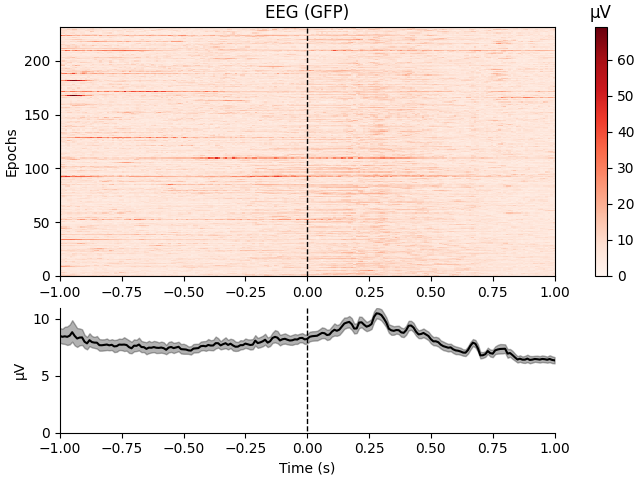

checkup: original (top) vs. ica-applied (bottom) epochs


In [32]:
# checkup: plot original (conventionally filtered) epochs
curr_checkup_epochs = mne.read_epochs(f"{curr_subject_path}/sub-01_task-SocialMemoryCuing_epo.fif")
mne.viz.plot_epochs_image(curr_checkup_epochs)
print("checkup: original (top) vs. ica-applied (bottom) epochs")

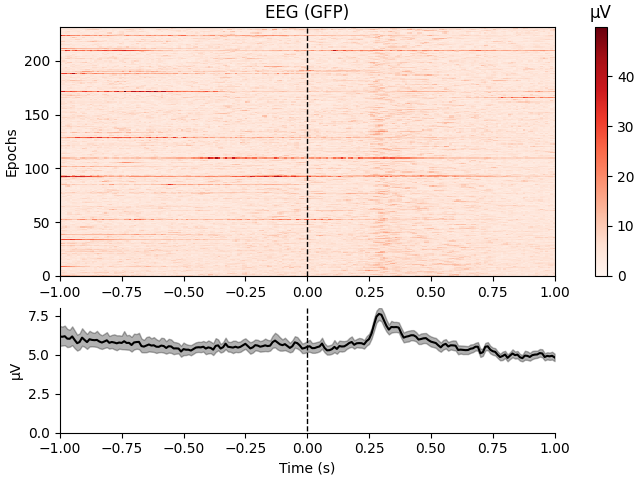

checkup: original (top) vs. ica-applied (bottom) epochs; Compare the scale in μV.


In [33]:
# checkup: plot ICA-corrected epochs
curr_checkup_epochs_ica = mne.read_epochs(f"{curr_subject_path}/sub-01_task-SocialMemoryCuing_proc-ica_epo.fif")
mne.viz.plot_epochs_image(curr_checkup_epochs_ica)
print("checkup: original (top) vs. ica-applied (bottom) epochs; Compare the scale in μV.")

In [ ]:
curr_steps = "preprocessing/_08_ptp_reject"
!mne_bids_pipeline --config {config_path} --steps {curr_steps}

In [ ]:
curr_steps = "sensor"
!mne_bids_pipeline --config {config_path} --steps {curr_steps}

In [ ]:
curr_steps = "source"
!mne_bids_pipeline --config {config_path} --steps {curr_steps}